In [34]:
#Primer paso de este ejercicio es importar todas las librerias que vamos a utilizar de todos los modelos 
from sklearn.datasets import load_wine 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, svm, datasets
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import statistics
from sklearn.neighbors import KNeighborsClassifier

In [35]:
#Punto 1
wine = load_wine() #agrego el dataset en una variable

In [36]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names) # lo cargo en un dataframe de Pandas, donde data son los valores de las columnas
wine_df["Clase"] = wine.target #agrego la variable target, que es la variable a predecir en nuestros modelos proximos

In [37]:
print(wine_df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  Clase  
0           

Punto 2, vamos a realizar la creación de dos datasets, uno con datos normalizados y otro con datos predeterminados de la base de datos

In [38]:
X = wine_df.drop('Clase', axis=1)
y = wine_df['Clase']
labels = wine.target_names #definimos labels para utilizar en las regresiones

In [39]:
X_train, X_test, y_train, y_test = train_test_split( #realizo el train_test_split con los valores originales
X, y, test_size=0.2, random_state=1, stratify=y
)

In [40]:
idx_train = X_train.index #guardo los valores de los indices originales en una variable para utilizarlos despues
idx_test = X_test.index

In [41]:
from sklearn.preprocessing import StandardScaler #importo preprocessing para utilizar StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  #escalamos todo x para conseguir valores estandarizados

In [42]:
#creamos Data frame con los datos normalizados
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

In [43]:
# Agregamos nuevamente la clase al DataFrame normalizado y realizamos una copia del DataFrame
wine_scaled_df = X_scaled_df.copy() #usamos esta funcion ya que mantenga los datos originales de x_scaled_df
wine_scaled_df['Clase'] = y.values

In [44]:
#realizo el mismo procedimiento que use antes, elimino la clase de x train, test y en la Y train, test utilizo solamente la columna clase que es nuestra variable a estimar.
#utilizo .loc [idx] para garantizar que los indices sean iguales en ambos DataFrame, normalizados y comunes
X_train_norm = wine_scaled_df.loc[idx_train].drop('Clase', axis=1)
X_test_norm = wine_scaled_df.loc[idx_test].drop('Clase', axis=1)
y_train_norm = wine_scaled_df.loc[idx_train]['Clase']
y_test_norm = wine_scaled_df.loc[idx_test]['Clase']

In [45]:
print(idx_train.equals(X_train_norm.index))  
print(idx_test.equals(X_test_norm.index))  #con estas dos lineas garantizamos que los dos dataFrame sean exactamente iguales los indices  

True
True


In [46]:
#Punto 3
# planteo la regresion logistica del primer data frame que es el predeterminado de la base de datos de wine
reglog = LogisticRegression(solver='lbfgs', C=100, max_iter=10000) 
reglog.fit(X_train, y_train) #utilizo datos de entrenamiento para predecir las variables de testeo

LogisticRegression(C=100, max_iter=10000)

In [47]:
ypred_reglog = reglog.predict(X_test)
print("El valor del accuracy del modelo de regresión logistica original es:",accuracy_score(y_test,ypred_reglog))
CM_reglog = confusion_matrix(y_test, ypred_reglog)

El valor del accuracy del modelo de regresión logistica original es: 1.0


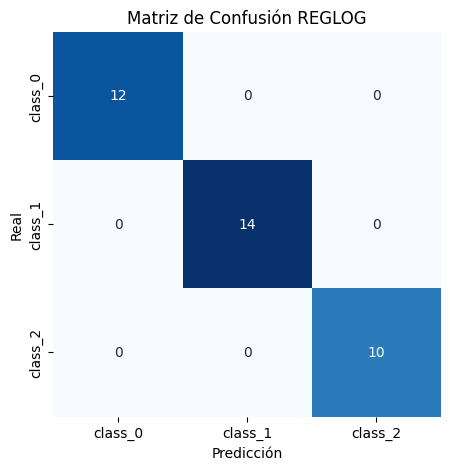

In [48]:
#Realizamos el gráfico de la matriz de confusión
plt.figure(figsize= (5,5))
sns.heatmap(CM_reglog, annot=True , fmt ='d', cmap='Blues',cbar=False, xticklabels=labels, yticklabels =labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión REGLOG')
plt.show()

In [49]:
#ahora realizamos la regresion logistica de la data normalizada utilizando el mismo razonamiento
reglog_norm = LogisticRegression(solver='lbfgs', C=100, max_iter=10000) 
reglog_norm.fit(X_train_norm, y_train_norm) #utilizo datos normalizados de entrenamiento 

LogisticRegression(C=100, max_iter=10000)

In [50]:
ypred_reglog_norm = reglog_norm.predict(X_test_norm)
print("El valor del accuracy del modelo de regresión logistica normal es:",accuracy_score(y_test_norm,ypred_reglog_norm)) #vemos el rendimiento de la regresión
CM_reglog_norm = confusion_matrix(y_test_norm, ypred_reglog_norm)

El valor del accuracy del modelo de regresión logistica normal es: 0.9722222222222222


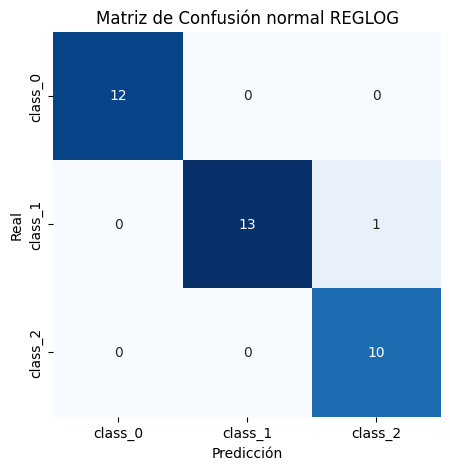

In [51]:
#realizo nuevamente matriz de confusión graficada
plt.figure(figsize= (5,5))
sns.heatmap(CM_reglog_norm, annot=True , fmt ='d', cmap='Blues',cbar=False, xticklabels=labels, yticklabels =labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión normal REGLOG')
plt.show()

In [52]:
#Punto 4 
#importamos las librerias que vamos a utilizar,
#vamos a realizar los modelos en base a los datos del DataFrame normalizado y el común obtenidos en puntos anteriores
from sklearn.utils.validation import check_random_state
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import RidgeCV

In [53]:
# Lo primero que voy a hacer es utilizar un valor de k, yo utilizare 5 para evitar clases iguales
# Vamos a utilizar el primer dataframe original para realizar el primer modelo de KNN
n_neighbors = 5
knn_uniform = neighbors.KNeighborsClassifier(n_neighbors, weights= "uniform") #elijo uniform para ambos modelos 
knn_uniform.fit(X_train, y_train) 
ypred_KNN_original = knn_uniform.predict(X_test)
print("El valor del accuracy del modelo KNN original es :", accuracy_score(y_test,ypred_KNN_original))
CM_knn_original = confusion_matrix(y_test, ypred_KNN_original)

El valor del accuracy del modelo KNN original es : 0.6666666666666666


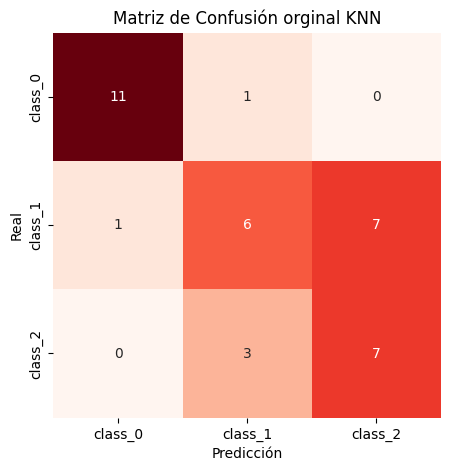

In [54]:
#realizo nuevamente matriz de confusión graficada
plt.figure(figsize= (5,5))
sns.heatmap(CM_knn_original, annot=True , fmt ='d', cmap='Reds',cbar=False, xticklabels=labels, yticklabels =labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión orginal KNN')
plt.show()

In [55]:
#Ahora realizo lo mismo para el Data frame normalizado
n_neighbors = 5
knn_uniform_norm = neighbors.KNeighborsClassifier(n_neighbors, weights= "uniform")
knn_uniform_norm.fit(X_train_norm, y_train_norm)
ypred_KNN_norm = knn_uniform_norm.predict(X_test_norm)
print("el valor del acuraccy del modelo KNN normal es: ",accuracy_score(y_test_norm,ypred_KNN_norm))
CM_knn_norm = confusion_matrix(y_test_norm, ypred_KNN_norm)

el valor del acuraccy del modelo KNN normal es:  1.0


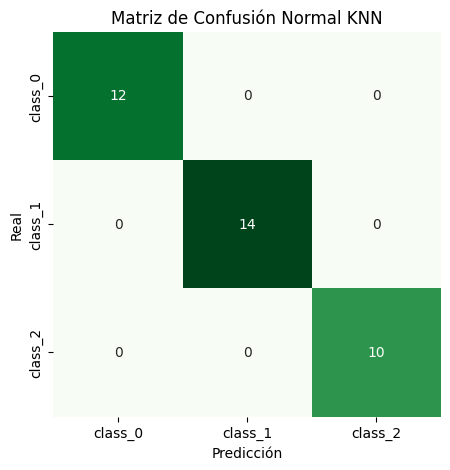

In [56]:
#realizo nuevamente matriz de confusión graficada
plt.figure(figsize= (5,5))
sns.heatmap(CM_knn_norm, annot=True , fmt ='d', cmap='Greens',cbar=False, xticklabels=labels, yticklabels =labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Normal KNN')
plt.show()

In [57]:
#Punto 5
#Por último vamos a realizar el modelo de support vector machine para ambos Data Frame
#Primero utilizaremos el data frame original para realizar el modelado
svm_orig = svm.SVC(kernel='linear', C=1E7) #elijo el kernel linear como dice la consigna del trabajo
svm_orig.fit(X_train, y_train)
ypred_svm_original = svm_orig.predict(X_test) #mismo proceso que todos los modelos anteriores
print("el valor del acuraccy del modelo svm original es: ",accuracy_score(y_test,ypred_svm_original))
CM_svm_orig = confusion_matrix(y_test, ypred_svm_original)

el valor del acuraccy del modelo svm original es:  1.0


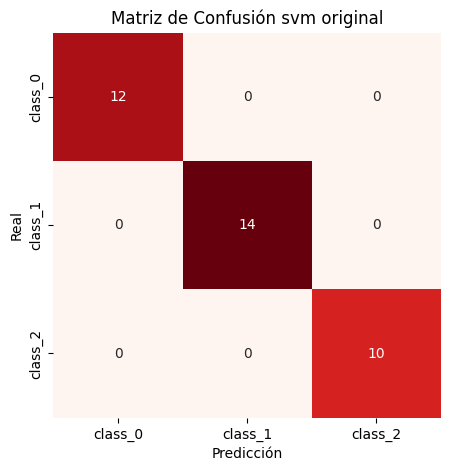

In [58]:
plt.figure(figsize= (5,5))
sns.heatmap(CM_svm_orig, annot=True , fmt ='d', cmap='Reds',cbar=False, xticklabels=labels, yticklabels =labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión svm original')
plt.show()

Ahora vamos a realizar el modelo de svm del data frame normalizado
es el mismo proceso que en los demas modelos que estuvimos realizando

In [59]:
svm_normal = svm.SVC(kernel='linear', C=1E7) #elijo el kernel linear como dice la consigna del trabajo
svm_normal.fit(X_train_norm, y_train_norm) #utilizo datos normalizados
ypred_svm_normal = svm_normal.predict(X_test_norm) #mismo proceso que todos los modelos anteriores
print("el valor del acuraccy del modelo svm normalizado es: ",accuracy_score(y_test_norm,ypred_svm_normal))
CM_svm_norm = confusion_matrix(y_test_norm, ypred_svm_normal)

el valor del acuraccy del modelo svm normalizado es:  0.9722222222222222


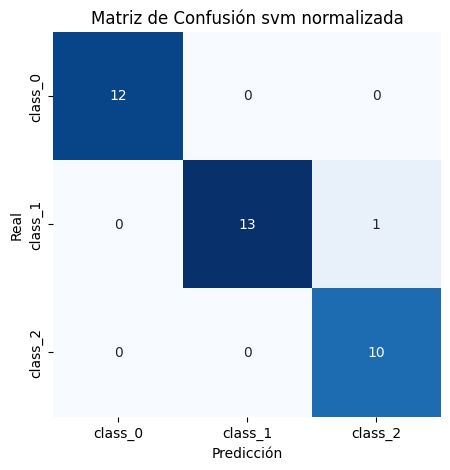

In [60]:
plt.figure(figsize= (5,5))
sns.heatmap(CM_svm_norm, annot=True , fmt ='d', cmap='Blues',cbar=False, xticklabels=labels, yticklabels =labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión svm normalizada')
plt.show()

In [61]:
#punto 6: 
"""Finalmente pudimos notar algo que es vital en cada modelo de machine learning, siempre es mejor utilizar
la forma normalizada que la del data frame original, porque funciona como una especie de preproceso, lo que nos da
un mejor valor de accuracy en todas los modelos. De esto podemos exceptuar el caso del svm original que tuvo mejor 
accuracy que el modelo normalizado. Los modelos normalizados siempre se mantuvieron por encima de 0,95 
pero en el caso de los valores originales pudimos ver muchas falencias.
La normalizacion nos ayuda a trabajar con todos los modelos en igualdad de condiciones, evita que variables con
mayor magnitud dominen el aprendizaje.
Tambien es importante recalcar como influye el valor del random state que utilicemos en el train_test_split, 
ya que eso nos puede intervenir en nuestro resultado de accuracy y R2 en el caso del modelo multilineal del punto 1 """

'Finalmente pudimos notar algo que es vital en cada modelo de machine learning, siempre es mejor utilizar\nla forma normalizada que la del data frame original, porque funciona como una especie de preproceso, lo que nos da\nun mejor valor de accuracy en todas los modelos. De esto podemos exceptuar el caso del svm original que tuvo mejor \naccuracy que el modelo normalizado. Los modelos normalizados siempre se mantuvieron por encima de 0,95 \npero en el caso de los valores originales pudimos ver muchas falencias.\nLa normalizacion nos ayuda a trabajar con todos los modelos en igualdad de condiciones, evita que variables con\nmayor magnitud dominen el aprendizaje.\nTambien es importante recalcar como influye el valor del random state que utilicemos en el train_test_split, \nya que eso nos puede intervenir en nuestro resultado de accuracy y R2 en el caso del modelo multilineal del punto 1 '